<a href="https://colab.research.google.com/github/saladnga/CS4410-Homeworks/blob/main/CS4410_HW4_VuHoang_1677986.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Homework 4 - CS4410 - Vu Hoang - 1677986

Ex 15.17

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

1. Loading the dataset

In [2]:
breast_cancer = load_breast_cancer()

In [11]:
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

2. Checking the Sample and Target Sizes

In [14]:
print("Sample Data Shape:" + str(breast_cancer.data.shape))
print("Sample Target Shape:" + str(breast_cancer.target.shape))

Sample Data Shape:(569, 30)
Sample Target Shape:(569,)


3. Splitting the Data for Training and Testing

In [13]:
X_train, X_test, y_train, y_test = train_test_split(breast_cancer.data, breast_cancer.target, random_state=11)

4. Training and Testing Set Sizes

In [15]:
print("Training Set Size:" + str(X_train.shape))
print("Testing Set Size:" + str(X_test.shape))

Training Set Size:(426, 30)
Testing Set Size:(143, 30)


5. Creating the Model (GaussianNB)

In [16]:
nb = GaussianNB()

6. Training the Model

In [17]:
nb.fit(X_train, y_train)

GaussianNB()

7. Predicting

In [18]:
predicted = nb.predict(X_test)
print("First 20 predictions:" + str(predicted[:20]))
print("First 20 actual labels:" + str(y_test[:20]))

First 20 predictions:[0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0]
First 20 actual labels:[0 0 0 0 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0]


8. Estimator Method score

In [23]:
accuracy = nb.score(X_test, y_test)
print(f"Model Accuracy Score: {accuracy:.2%}")

Model Accuracy Score: 95.10%


9. Confusion Matrix

In [24]:
confusion = confusion_matrix(y_test, predicted)
print("Confusion Matrix:")
print(confusion)

Confusion Matrix:
[[44  6]
 [ 1 92]]


10. Classification Report

In [25]:
classification = classification_report(y_test, predicted)
print("Classification Report:")
print(classification)

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.88      0.93        50
           1       0.94      0.99      0.96        93

    accuracy                           0.95       143
   macro avg       0.96      0.93      0.94       143
weighted avg       0.95      0.95      0.95       143



11. Visualizing the Confusion Matrix

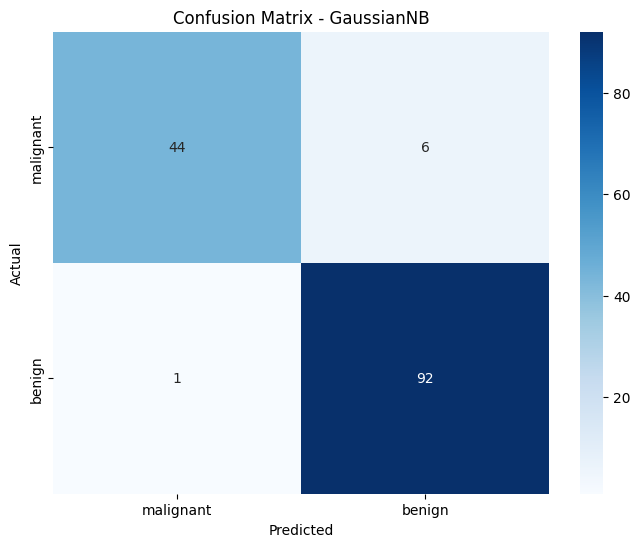

In [26]:
confusion_df = pd.DataFrame(confusion, index=breast_cancer.target_names, columns=breast_cancer.target_names)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_df, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix - GaussianNB')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

12. K-Fold Cross-Validation + Using the KFold Object with Function cross_val_score

In [30]:
kfold = KFold(n_splits=10, random_state=11, shuffle=True)
scores = cross_val_score(nb, breast_cancer.data, breast_cancer.target, cv=kfold)
print(f"Mean Accuracy: {scores.mean():.2%}")
print(f"Standard Deviation: {scores.std():.2%}")

Mean Accuracy: 93.85%
Standard Deviation: 2.75%


13. Running Multiple Models to Find the Best One

In [40]:
pipe_lr = Pipeline([('scl', StandardScaler()), ('clf', LogisticRegression(max_iter=1000))])
models = { 'GaussianNB': GaussianNB(), 'KNN': Pipeline([ ('scaler', StandardScaler()), ('knn', KNeighborsClassifier()) ]), 'LogisticRegression': Pipeline([ ('scaler', StandardScaler()), ('lr', LogisticRegression(max_iter=1000)) ]), 'SVC': Pipeline([ ('scaler', StandardScaler()), ('svc', SVC()) ]) }
print("Comparing Models:")
for model_name, model_object in models.items():
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    scores = cross_val_score(estimator=model_object, X=breast_cancer.data, y=breast_cancer.target, cv=kfold)
    print(f"{model_name}: " + f"Mean accuracy: {scores.mean():.2%}; " + f"Standard deviation: {scores.std():.2%})")

Comparing Models:
GaussianNB: Mean accuracy: 93.85%; Standard deviation: 2.75%)
KNN: Mean accuracy: 96.83%; Standard deviation: 1.90%)
LogisticRegression: Mean accuracy: 97.89%; Standard deviation: 1.31%)
SVC: Mean accuracy: 97.89%; Standard deviation: 1.32%)
